#**LOGISTIC NOTES**

In [0]:
!pip install seqeval
!pip install scispacy
!python -m spacy download en_core_web_sm

In [0]:
import pandas as pd
import numpy as np

from scipy import sparse

import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import text_to_word_sequence
import pickle

import scispacy
import spacy
from scispacy.abbreviation import AbbreviationDetector
from spacy import displacy
import en_core_web_sm

In [6]:
#Reading the csv file
df = pd.read_csv('Logician.csv', encoding = "ISO-8859-1")
df

,ID,ENROLL,DOCNAME,CLINDATE,NOTE_TEXT,Alcohol Use,Amount,Alcohol Abuse Current,Alcohol Abuse Past,Current Drug Use,Past Drug Use,Type,Current Smoker,Former Smoker,Amount.1,Notes/Questions
0,2654.0,ENR-019366,Office Visit,12/20/2013,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,N,0,NaN,NaN,NaN,NaN,NaN,NaN,y,NONE QUIT YEARS AGO,NaN
1,2654.0,ENR-019366,Office Visit,12/09/2013,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,N,0,NaN,NaN,NaN,NaN,NaN,NaN,Y,QUIT 1970S,NaN
2,2654.0,ENR-019366,Office Visit,09/03/2014,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2654.0,ENR-019366,Office Visit,05/09/2014,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,N,0,NaN,NaN,NaN,NaN,NaN,NaN,Y,NONE QUIT YEARS AGO,NaN
4,2654.0,ENR-019366,Emergency Report,07/01/2015,{{{ Courier New;}}{ ; ;}{{ Normal;}{ Default ...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"Says both ""former smoker"" and ""never smoker"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2710.0,ENR-018933,Office Visit,04/24/2014,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,Y,4 BEERS/DAY,NaN,NaN,N,NaN,NaN,Y,NaN,EVERY DAY <1PPD,NaN
388,2593.0,ENR-019962,Emergency Report,05/31/2015,{{{ Courier New;}}{ ; ; ;}{{ Normal;}{ Defaul...,N,NaN,NaN,NaN,Y,NaN,HEROIN,N,N,NaN,NaN
389,2593.0,ENR-017142,Emergency Report,05/31/2015,{{{ Courier New;}}{ ; ; ;}{{ Normal;}{ Defaul...,N,NaN,NaN,NaN,Y,NaN,HEROIN,N,N,NaN,NaN
390,2593.0,ENR-019962,Emergency Report,05/20/2015,{{{ Courier New;}}{ ; ;}{{ Normal;}{ Default ...,N,NaN,NaN,NaN,Y,NaN,HEROIN,N,N,NaN,NaN


In [7]:
df.describe()

,ID
count,359.000000
mean,2663.997214
std,40.791779
min,2593.000000
25%,2638.000000
50%,2672.000000
75%,2698.000000
max,2715.000000


In [8]:
selectlist =[ 'ID', 'NOTE_TEXT' , 'Alcohol Abuse Current', 'Current Drug Use', 'Current Smoker']
selectlist =[x for x in df.columns if x in selectlist]
df = df[selectlist]
df

,ID,NOTE_TEXT,Alcohol Abuse Current,Current Drug Use,Current Smoker
0,2654.0,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,NaN,NaN,NaN
1,2654.0,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,NaN,NaN,NaN
2,2654.0,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,NaN,NaN,NaN
3,2654.0,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,NaN,NaN,NaN
4,2654.0,{{{ Courier New;}}{ ; ;}{{ Normal;}{ Default ...,NaN,NaN,NaN
...,...,...,...,...,...
387,2710.0,{{{ Arial;}}{ ; ; ; ; ; ; ; ;}{{ Normal;}{ De...,NaN,N,Y
388,2593.0,{{{ Courier New;}}{ ; ; ;}{{ Normal;}{ Defaul...,NaN,Y,N
389,2593.0,{{{ Courier New;}}{ ; ; ;}{{ Normal;}{ Defaul...,NaN,Y,N
390,2593.0,{{{ Courier New;}}{ ; ;}{{ Normal;}{ Default ...,NaN,Y,N


In [0]:
nlp = en_core_web_sm.load()

In [0]:
notes = df['NOTE_TEXT'].tolist()

X_ner = []
for i in range(len(df)):
    text = str(notes[i])
    doc = nlp(text)
    #print(doc.ents)

    a = [i.text for i in doc.ents]
    a = ''.join(a)
    X_ner.append(a)

In [0]:
notes_len =[]
for i in range(len(X_ner)):
    notes_len.append(len(X_ner[i]))

In [0]:
df['Note Length'] = notes_len

In [19]:
plt2 = go.Histogram(x = notes_len)
lyt2 = go.Layout(title="Frequency of Notes Length", xaxis=dict(title='Notes Length', range=[0,10000]), yaxis=dict(title='Frequency'))
fig2 = go.Figure(data=[plt2], layout=lyt2)
iplot(fig2)

In [20]:
df.drop('NOTE_TEXT', axis = 1, inplace = True)
df.insert(1, 'NOTE_TEXT', X_ner)

df

,ID,NOTE_TEXT,Alcohol Abuse Current,Current Drug Use,Current Smoker,Note Length
0,2654.0,BlockquoteCITEFollowedHyperlinkKeyboardEnglish...,NaN,NaN,NaN,1067
1,2654.0,BlockquoteCITEFollowedHyperlinkKeyboardEnglish...,NaN,NaN,NaN,1015
2,2654.0,BlockquoteCITEFollowedHyperlinkKeyboardEnglish...,NaN,NaN,NaN,1215
3,2654.0,BlockquoteCITEFollowedHyperlinkKeyboardEnglish...,NaN,NaN,NaN,821
4,2654.0,95Rib Pain\n 73Trauma3 hoursFall73 yrHTNHCVD...,NaN,NaN,NaN,204
...,...,...,...,...,...,...
387,2710.0,BlockquoteCITEFollowedHyperlinkKeyboardSarah G...,NaN,N,Y,863
388,2593.0,95Back Pain\n\n HPIPast Medical History95BP983...,NaN,Y,N,91
389,2593.0,95Back Pain\n\n HPIPast Medical History95BP983...,NaN,Y,N,91
390,2593.0,95last nightHPIOnsetChronicHeroinAssociated95R...,NaN,Y,N,164


# **MODELS**

In [0]:
# Linear svc, knn, naive bayes
def linsvc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 11)
    classf = LinearSVC()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("### Linear SVC: ###")
    consolidatedMeasure = precision_recall_fscore_support(y_test.to_numpy().astype(int), pred.astype(int), average = 'binary')
    recallMeasure = round(consolidatedMeasure[0]*100,2)
    precisionMeasure =  round(consolidatedMeasure[1]*100,2)
    F1score = round(consolidatedMeasure[2]*100,2)
    print("Accuracy:",round(accuracy_score(y_test, pred)*100,2),'%')
    print("F1 score:",F1score,'%')
    print("Precision:",precisionMeasure,'%')
    print("Recall:", recallMeasure,'%','\n')
    return(y_test, pred)

def revknn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 11)
    classf = KNeighborsClassifier(n_neighbors=2)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("### kNN: ###")
    consolidatedMeasure = precision_recall_fscore_support(y_test.to_numpy().astype(int), pred.astype(int), average = 'binary')
    recallMeasure = round(consolidatedMeasure[0]*100,2)
    precisionMeasure =  round(consolidatedMeasure[1]*100,2)
    F1score = round(consolidatedMeasure[2]*100,2)
    print("Accuracy:",round(accuracy_score(y_test, pred)*100,2),'%')
    print("F1 score:",F1score,'%')
    print("Precision:",precisionMeasure,'%')
    print("Recall:", recallMeasure,'%','\n')
    return(y_test, pred)

def revnb(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 11)
    classf = MultinomialNB()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("### Naive Bayes: ###")
    consolidatedMeasure = precision_recall_fscore_support(y_test.to_numpy().astype(int), pred.astype(int), average = 'binary')
    recallMeasure = round(consolidatedMeasure[0]*100,2)
    precisionMeasure =  round(consolidatedMeasure[1]*100,2)
    F1score = round(consolidatedMeasure[2]*100,2)
    print("Accuracy:",round(accuracy_score(y_test, pred)*100,2),'%')
    print("F1 score:",F1score,'%')
    print("Precision:",precisionMeasure,'%')
    print("Recall:", recallMeasure,'%','\n')
    return(y_test, pred)

# **CONFUSION MATRIX**

In [0]:
# similar version of sklearn fuction
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **1. ALCOHOL USE**

In [24]:
selectlist =[ 'NOTE_TEXT' , 'Alcohol Abuse Current', 'Note Length']
selectlist =[x for x in df.columns if x in selectlist]
alcohol = df[selectlist].dropna()
alcohol['Alcohol Abuse Current'] = np.where(alcohol['Alcohol Abuse Current'] == 'N', 0, 1)

alcohol

,NOTE_TEXT,Alcohol Abuse Current,Note Length
41,BlockquoteCITEFollowedHyperlinkKeyboardVital S...,1,810
50,xxx1xxxxxxxxx DOB27048029612/04/2013 17:45...,0,926
52,xxx1xxxxxxxxx DOB25689876808:1517:35157CMW...,0,713
53,xxx1xxxxxxxxx DOB25617771817:4012:11167CMW...,1,992
68,xxx xxx1xxxxxxxxx DOB24833670316:06157CMWE...,0,725
...,...,...,...
366,9554Associated9595Cardiovascularmyalgiasarthra...,1,180
367,95Chest Pain\n 54HTNHLDsz2 hourspast 3\n day...,1,271
369,HPItoday21 weeks95959595Schizophrenia\n 95195...,1,156
373,xxx1xxxxxxxxx DOB25784774912:1315:30175CMW...,1,307


In [25]:

note_len_df = alcohol.sort_values(by='Note Length')
plt3 = go.Scatter(x = note_len_df['Note Length'], y = alcohol['Alcohol Abuse Current'], mode='markers')
lyt3 = go.Layout(title="Notes Length vs. Alcohol Abuse Current", xaxis=dict(title='Notes Length'),yaxis=dict(title='Alcohol Abuse Current'))
fig3 = go.Figure(data=[plt3], layout=lyt3)
iplot(fig3)
print("Notes Length to Alcohol Use Correlation:", note_len_df['Note Length'].corr(alcohol['Alcohol Abuse Current']))

Notes Length to Alcohol Use Correlation: -0.1439077031675646


In [26]:
x1 = alcohol['NOTE_TEXT']
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)

y1 = alcohol['Alcohol Abuse Current']
y1

41     1
50     0
52     0
53     1
68     0
      ..
366    1
367    1
369    1
373    1
374    1
Name: Alcohol Abuse Current, Length: 70, dtype: int64

In [83]:
svmy1,svmp1 = linsvc(x_vect1,y1)
knny1,knnp1 = revknn(x_vect1,y1)
nby1,nbp1 = revnb(x_vect1,y1)

### Linear SVC: ###
Accuracy: 88.89 %
F1 score: 90.0 %
Precision: 81.82 %
Recall: 100.0 % 

### kNN: ###
Accuracy: 83.33 %
F1 score: 84.21 %
Precision: 72.73 %
Recall: 100.0 % 

### Naive Bayes: ###
Accuracy: 88.89 %
F1 score: 90.0 %
Precision: 81.82 %
Recall: 100.0 % 



Confusion matrix, without normalization
[[7 0]
 [2 9]]
Confusion matrix, without normalization
[[7 0]
 [3 8]]
Confusion matrix, without normalization
[[7 0]
 [2 9]]


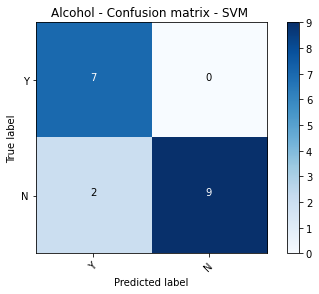

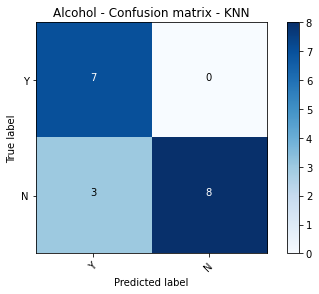

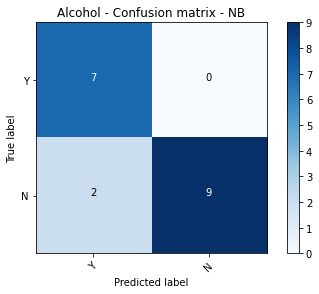

In [84]:
c11 = confusion_matrix(svmy1,svmp1)
c21 = confusion_matrix(knny1,knnp1)
c31 = confusion_matrix(nby1,nbp1)
class_names = ['Y', 'N']
plt.figure()
plot_confusion_matrix(c11, classes=class_names,normalize=False,title='Alcohol - Confusion matrix - SVM ')
plt.figure()
plot_confusion_matrix(c21, classes=class_names,normalize=False,title='Alcohol - Confusion matrix - KNN')
plt.figure()
plot_confusion_matrix(c31, classes=class_names,normalize=False,title='Alcohol - Confusion matrix - NB')

## **2. Drug use**

In [85]:
selectlist2 =[ 'NOTE_TEXT' , 'Current Drug Use', 'Note Length']
selectlist2 =[x for x in df.columns if x in selectlist2]
drug = df[selectlist2].dropna()
drug['Current Drug Use'] = np.where(drug['Current Drug Use'] == 'N', 0, 1)

drug

,NOTE_TEXT,Current Drug Use,Note Length
17,BlockquoteCITEFollowedHyperlinkKeyboardLisa Fr...,0,1137
18,BlockquoteCITEFollowedHyperlinkKeyboardKavitha...,0,1460
20,BlockquoteCITEFollowedHyperlinkKeyboardAlysia ...,0,783
21,95Tailbone Pain\n\n PatientLumbarDuration3 day...,0,128
23,BlockquoteCITEFollowedHyperlinkKeyboardStacey ...,0,780
...,...,...,...
387,BlockquoteCITEFollowedHyperlinkKeyboardSarah G...,0,863
388,95Back Pain\n\n HPIPast Medical History95BP983...,1,91
389,95Back Pain\n\n HPIPast Medical History95BP983...,1,91
390,95last nightHPIOnsetChronicHeroinAssociated95R...,1,164


In [86]:
note_len_df = drug.sort_values(by='Note Length')
plt4 = go.Scatter(x = note_len_df['Note Length'], y = drug['Current Drug Use'], mode='markers')
lyt4 = go.Layout(title="Notes Length vs. Current Drug Use", xaxis=dict(title='Notes Length'),yaxis=dict(title='Current Drug Use'))
fig4 = go.Figure(data=[plt4], layout=lyt4)
iplot(fig4)
print("Notes Length to Current Drug Use Correlation:", note_len_df['Note Length'].corr(drug['Current Drug Use']))

Notes Length to Current Drug Use Correlation: -0.32920513699219933


In [87]:
x1 = drug['NOTE_TEXT']
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)

y2 = drug['Current Drug Use']
y2

17     0
18     0
20     0
21     0
23     0
      ..
387    0
388    1
389    1
390    1
391    1
Name: Current Drug Use, Length: 185, dtype: int64

In [88]:
svmy2,svmp2 = linsvc(x_vect1,y2)
knny2,knnp2 = revknn(x_vect1,y2)
nby2,nbp2 = revnb(x_vect1,y2)

### Linear SVC: ###
Accuracy: 80.85 %
F1 score: 84.75 %
Precision: 100.0 %
Recall: 73.53 % 

### kNN: ###
Accuracy: 82.98 %
F1 score: 84.0 %
Precision: 84.0 %
Recall: 84.0 % 

### Naive Bayes: ###
Accuracy: 80.85 %
F1 score: 84.75 %
Precision: 100.0 %
Recall: 73.53 % 



Confusion matrix, without normalization
[[13  9]
 [ 0 25]]
Confusion matrix, without normalization
[[18  4]
 [ 4 21]]
Confusion matrix, without normalization
[[13  9]
 [ 0 25]]


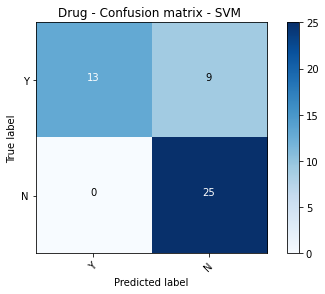

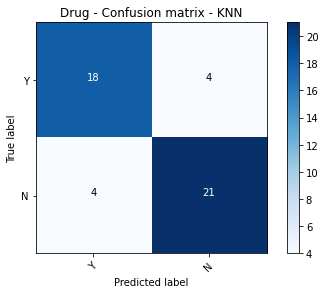

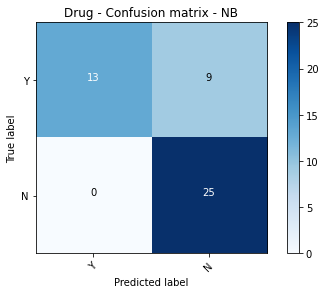

In [89]:
c12 = confusion_matrix(svmy2,svmp2)
c22 = confusion_matrix(knny2,knnp2)
c32 = confusion_matrix(nby2,nbp2)
class_names = ['Y', 'N']
plt.figure()
plot_confusion_matrix(c12, classes=class_names,normalize=False,title='Drug - Confusion matrix - SVM ')
plt.figure()
plot_confusion_matrix(c22, classes=class_names,normalize=False,title='Drug - Confusion matrix - KNN')
plt.figure()
plot_confusion_matrix(c32, classes=class_names,normalize=False,title='Drug - Confusion matrix - NB')

## **3. Current Smoker**

In [90]:
selectlist3 =[ 'NOTE_TEXT' , 'Current Smoker', 'Note Length']
selectlist3 =[x for x in df.columns if x in selectlist3]
smoker = df[selectlist3].dropna()
smoker['Current Smoker'] = np.where(smoker['Current Smoker'] == 'N', 0, 1)

smoker

,NOTE_TEXT,Current Smoker,Note Length
17,BlockquoteCITEFollowedHyperlinkKeyboardLisa Fr...,0,1137
18,BlockquoteCITEFollowedHyperlinkKeyboardKavitha...,0,1460
19,BlockquoteCITEFollowedHyperlinkKeyboardLanadya...,0,1087
20,BlockquoteCITEFollowedHyperlinkKeyboardAlysia ...,0,783
21,95Tailbone Pain\n\n PatientLumbarDuration3 day...,0,128
...,...,...,...
387,BlockquoteCITEFollowedHyperlinkKeyboardSarah G...,1,863
388,95Back Pain\n\n HPIPast Medical History95BP983...,0,91
389,95Back Pain\n\n HPIPast Medical History95BP983...,0,91
390,95last nightHPIOnsetChronicHeroinAssociated95R...,0,164


In [91]:
plt5 = go.Scatter(x = note_len_df['Note Length'], y = smoker['Current Smoker'], mode='markers')
lyt5 = go.Layout(title="Notes Length vs. Current Smoker", xaxis=dict(title='Notes Length'),yaxis=dict(title='Current Smoker'))
fig5 = go.Figure(data=[plt5], layout=lyt5)
iplot(fig5)
print("Notes Length to Current Smoker Correlation:", note_len_df['Note Length'].corr(smoker['Current Smoker']))

Notes Length to Current Smoker Correlation: 0.008779685002952965


In [92]:
x1 = smoker['NOTE_TEXT']
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)

y3 = smoker['Current Smoker']
y3

17     0
18     0
19     0
20     0
21     0
      ..
387    1
388    0
389    0
390    0
391    0
Name: Current Smoker, Length: 222, dtype: int64

In [93]:
svmy3,svmp3 = linsvc(x_vect1,y3)
knny3,knnp3 = revknn(x_vect1,y3)
nby3,nbp3 = revnb(x_vect1,y3)

### Linear SVC: ###
Accuracy: 83.93 %
F1 score: 90.72 %
Precision: 100.0 %
Recall: 83.02 % 

### kNN: ###
Accuracy: 87.5 %
F1 score: 92.31 %
Precision: 95.45 %
Recall: 89.36 % 

### Naive Bayes: ###
Accuracy: 78.57 %
F1 score: 88.0 %
Precision: 100.0 %
Recall: 78.57 % 



Confusion matrix, without normalization
[[ 3  9]
 [ 0 44]]
Confusion matrix, without normalization
[[ 7  5]
 [ 2 42]]
Confusion matrix, without normalization
[[ 0 12]
 [ 0 44]]


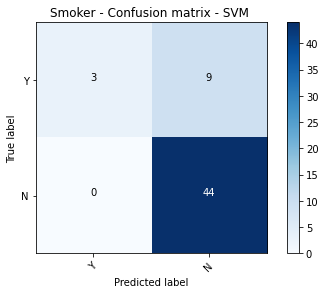

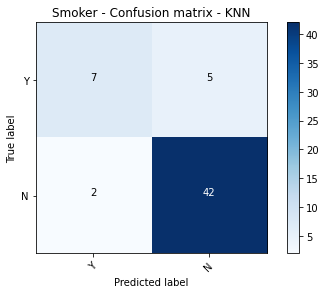

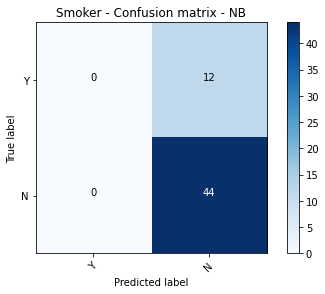

In [94]:
c13 = confusion_matrix(svmy3,svmp3)
c23 = confusion_matrix(knny3,knnp3)
c33 = confusion_matrix(nby3,nbp3)
class_names = ['Y', 'N']
plt.figure()
plot_confusion_matrix(c13, classes=class_names,normalize=False,title='Smoker - Confusion matrix - SVM ')
plt.figure()
plot_confusion_matrix(c23, classes=class_names,normalize=False,title='Smoker - Confusion matrix - KNN')
plt.figure()
plot_confusion_matrix(c33, classes=class_names,normalize=False,title='Smoker - Confusion matrix - NB')